# Introduction

This notebook investigates the famous Fisher Iris dataset (Fisher, R. (1936). Iris [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.)

See the README file in this repository for a more detailed background on this famous dataset.

In [1]:
# First, import necessary libraries for importing data and whatever analysis follows
# will put these in a requirements file later
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder as le
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statistics


Note: Where possible throughout this analysis, I will be writing my output to a txt file and saving any images to a png file. This is for the purpose of saving the results of my analysis.

# Step 1: Acquiring the Data

The first step involves acquiring the data. 
Data has been downloaded from https://archive.ics.uci.edu/dataset/53/iris which includes the option to import data using python.


In [2]:
# ucimlrepo is a package for importing datasets from the the UC Irvine Machine Learning Repository.
# See: https://github.com/uci-ml-repo/ucimlrepo     
from ucimlrepo import fetch_ucirepo 

In [3]:
# fetch the data. the ID specifies which of the UCI datasets you want.
iris = fetch_ucirepo(id=53) 

The data that is fetched also contains metadata. Let's take a look.

In [4]:
# metadata contains details of the dataset including its main characterisics, shape, info on missing data, and relevant links (e.g. where to find raw data) 
# the meta data also contains detailed additional information including text descriptions of variables, funding sources, and the purpose of the data, 
print(iris.metadata) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [5]:
# here we will begin writing the output to a file
# first create a file name 'irisis_project.txt' which we will alias as f
# the 'wt' option means we are writing to a text file.
# the following resource was used for writing this code: https://www.geeksforgeeks.org/reading-writing-text-files-python/#write-to-text-file-in-python 
with open('iris_project.txt', 'wt') as f:
    print(iris.metadata, file=f) # print the metadata to the file

We can see from looking at the metadata that the download comes with a lot more than just the data about the iris flowers. It also contains a link to where the data is downloaded from, an abstract about the dataset, the main research area the dataset pertains to (i.e. biology), the year of its creation, and some details about the datasets structure.

That is helpful but for exploring the data itself, we do not need this full downloaded package.

In [6]:
# lets take the data and save it to a variable called iris
iris = iris.data

# Step 2: Initial exploration of data package structure

In [7]:
# now that iris is where we've stored the data, print iris to see what it contains
print(iris)

{'ids': None, 'features':      sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns], 'targets':               class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[

In [ ]:
# append the above shown above to my iris_project.txt file
# using the append method found: https://realpython.com/read-write-files-python/#appending-to-a-file 
with open('iris_project.txt', 'at') as f:
    print(iris, file=f) # print the data to the file

As shown above, when you load iris data it returns as a dictionary-like object which contains a list of features, a list of classes, and each instance of the dataset.
What do each of these elements represent?
- Each class represents a different species of iris
- Each feature represents a different measured aspect of the flowers
- Each instance represents a specific flower and the measurements of its features in centimeters.

Let's look at each of these below

In [8]:
# look at the features of the data. you can see the columns represent sepal length, sepal width, petal length, and petal width.
print(iris.features)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [9]:
# append to the file
with open('iris_project.txt', 'at') as f:
    print(iris.features, file=f)

In [10]:
# the targets are labels for the data. in this case, they are the species of iris flower (setosa, versicolor, virginica).
print(iris.targets)

# and save the targets to the file
with open('iris_project.txt', 'at') as f:
    print(iris.targets, file=f)

              class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


# Step 3: Explore and summarise the dataset

Before conducting any exploratory analysis, I have to prepare my dataset.

In [12]:
# I would like to have both the targets and features in one dataframe to make my analysis and code easier. 
# I put each into variables called X and y in preparation for concatenation.
X = iris.features 
y = iris.targets 

In [13]:
# i then used these two variables to create a new dataframe called iris_df.
# we'll use the pandas function concat to do this. we'll specify we're joining on axis=1, which means we're joining on the columns. 
# see: https://pandas.pydata.org/docs/user_guide/merging.html#joining-logic-of-the-resulting-axis 
iris_df = pd.concat([X, y], axis=1)

Let's explore our new dataframe. we'll start looking at the top and bottom 5 rows to get a sense of what the data looks like.

In [ ]:
# return top 5 rows
# see: https://www.w3schools.com/python/pandas/ref_df_head.asp#:~:text=The%20head()%20method%20returns,a%20number%20is%20not%20specified.&text=Note%3A%20The%20column%20names%20will,addition%20to%20the%20specified%20rows.
iris_df.head()
    

In [ ]:
# append to the file
with open('iris_project.txt', 'at') as f:
    print(iris_df.head(), file=f) # print the data to the file

In [ ]:
# return bottom 5 rows.
# https://www.w3schools.com/python/pandas/ref_df_tail.asp#:~:text=The%20tail()%20method%20returns,a%20number%20is%20not%20specified.
iris_df.tail()

In [ ]:
# append to the file
with open('iris_project.txt', 'at') as f:
    print(iris_df.tail(), file=f) # print the data to the file

In [ ]:
# next check the shape of iris data, meaning how many rows and how many columns.
iris_df.shape


In [ ]:
# append to the file
with open('iris_project.txt', 'at') as f:
    print(iris_df.shape, file=f) # print the data to the file

We can see that there are now 150 rows and 5 columns in my dataframe.

Next, let's double check what type of data are included in the iris dataframe.

In [15]:
iris_df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [17]:
# append the types to the file
with open('iris_project.txt', 'at') as f:
    print(iris_df.dtypes, file=f)

We can see that each column is a float64 type, except for the target/class column.

In [16]:
# we can check for nulls by combining the ifnull function with the sum function
# see: https://www.w3schools.com/python/pandas/ref_df_isnull.asp 
# and https://www.w3schools.com/python/pandas/ref_df_sum.asp
print(iris_df.isnull().sum())

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


In [ ]:
# save null details to the file
with open('iris_project.txt', 'at') as f:
    print(iris_df.isnull().sum(), file=f)

Now we will move on to summarizing the basic descriptive aspects of the dataset, which will tell us about the flowers themselves.

In [17]:
# Describe the data set. This will show basic descriptive statistics for each column in the dataframe.
# This includes the count, mean, standard deviation, min, max, and 25th, 50th, and 75th percentiles.
# see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html 
iris_df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
# append describe output to the file
with open('iris_project.txt', 'at') as f:
    print(iris_df.describe(), file=f) # print the data to the file

Describe has given us the mean, SD  and quartiles for each column. The 50% quartile is equivalent to the median. 

Let's look other measures of distirbution for each column.

In [18]:
# the skew function will show us the skewness of the data. the skewness of a measure of how distributed the data is around the mean. 
# see: https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis 
# i want it for each column so im going to use for loop to save time. see: https://statisticsglobe.com/iterate-over-columns-pandas-dataframe-python 

# for each column in iris df, calculate the skewness and then print it out.  
for column in iris_df:
   if column != 'class': # first check if the column is not the class column. that has strings so won't work - learned this from earlier error. 
    skew = iris_df[column].skew()
    print (f"Skewness of {column}: {skew}")


Skewness of sepal length: 0.3149109566369728
Skewness of sepal width: 0.3340526621720866
Skewness of petal length: -0.27446425247378287
Skewness of petal width: -0.10499656214412734


In [20]:
# save skewness to the file
with open('iris_project.txt', 'at') as f:
    for column in iris_df:
        if column != 'class':
            skew = iris_df[column].skew()
            print (f"Skewness of {column}: {skew}", file=f)

In [19]:
# Similarly, we can check the data for kurtosis. According to data camp, "kurtosis focuses more on the height. It tells us how peaked or flat our normal (or normal-like) distribution is. 
# see https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis
# for each column in iris df, calculate the skewness and then print it out.  
for column in iris_df:
   if column != 'class': # first check if the column is not the class column. that has strings so won't work - learned this from earlier error. 
    kurtosis = iris_df[column].kurtosis()
    print (f"Kurtosis of {column}: {kurtosis}")

Kurtosis of sepal length: -0.5520640413156395
Kurtosis of sepal width: 0.2907810623654279
Kurtosis of petal length: -1.4019208006454036
Kurtosis of petal width: -1.3397541711393433


In [21]:
# save kurtosis to the file
with open('iris_project.txt', 'at') as f:
    for column in iris_df:
        if column != 'class':
            kurtosis = iris_df[column].kurtosis()
            print (f"Kurtosis of {column}: {kurtosis}", file=f)

We can see from the analysis above that the mean and median are largely similar. Similarly, both our skewness and kurtosis are within normal range. These findingins indiate our data is fairly normally distributed and not impacted by many outliers (see: https://www.smartpls.com/documentation/functionalities/excess-kurtosis-and-skewness)

The mean sepal length across the dataset is apprx. 5.6cm. The mean sepal width is approx. 3.1cm. While the means for petal length and width are 3.8cm and 1.2cm, respectively.

In [20]:
# The class column is a string variable and therefore we cannot calculate mean, median, skewness, or kurtosis as we did above. However, we can count the occurence of each value.
# the value_counts function will return a series containing counts of unique values. 
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html 
iris_df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [22]:
# append the counts to the file
with open('iris_project.txt', 'at') as f:
    print(iris_df['class'].value_counts(), file=f)

# Step 4: Visualize distribution

In this section, we will look at visualising the distribution of the dataset using histograms and boxplots. These visualizations compliment the analysis above.

In [23]:
# put the columns into their own variables so i can do a histogram for each. give them short names for sake of writing code later.
sl = iris_df['sepal length']
sw = iris_df['sepal width']
pl = iris_df['petal length']
pw = iris_df['petal width']

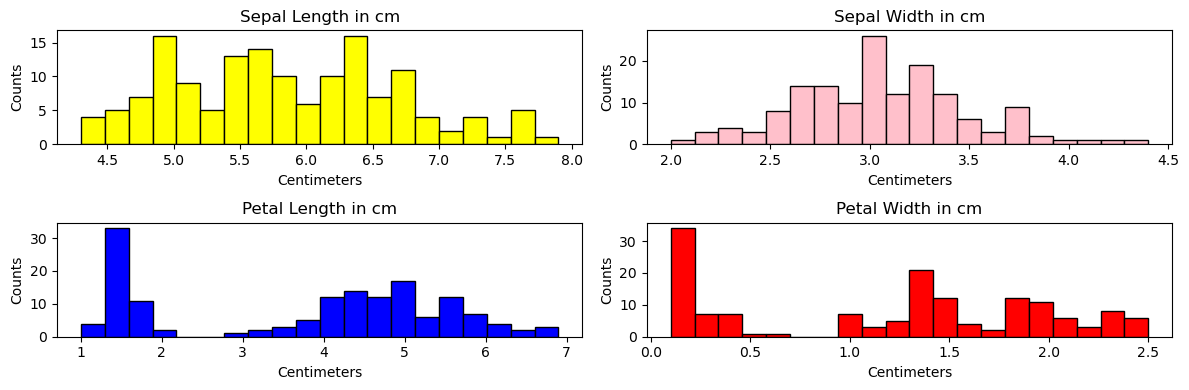

In [ ]:
# for documentation on hist function, see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# for example of hist using iris see: https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/ 
# For example of plotting multiple hists on one plot see: https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/  

# Creating subplots with multiple histograms. i have 4 things to display so i'm doing a 2x2 plot.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))

# these axes figures dictate where on the plot the particular subplot will appear (e.g. 0,0 = first row, first column.)
# specify your datasource, number of bins, colour of bars, and colour of outline.
axes[0,0].hist(sl, bins=20, color='Yellow', edgecolor='black')
axes[0,0].set_title('Sepal Length in cm')
 
axes[0,1].hist(sw, bins=20, color='Pink', edgecolor='black')
axes[0,1].set_title('Sepal Width in cm')

axes[1,0].hist(pl, bins=20, color='Blue', edgecolor='black')
axes[1,0].set_title('Petal Length in cm')

axes[1,1].hist(pw, bins=20, color='Red', edgecolor='black')
axes[1,1].set_title('Petal Width in cm')

# Adding labels and title. initial error iterating over each subplot individually- code adjusted by Microsoft Co-Pilot.
for ax in axes.flat:
    ax.set_xlabel('Centimeters')
    ax.set_ylabel('Counts')

# Adjusting layout for better spacing. without this all the titles start overlapping.
plt.tight_layout()

# Saving the plot as a png file
# see: https://www.geeksforgeeks.org/how-to-save-a-plot-to-a-file-using-matplotlib/ 
plt.savefig("histograms.png")

# Display the figure
plt.show()

To supplement the histograms, let's confirm some of what we're seeing by calculating the modes of the data. The mode is the most common value in a dataset.

See: https://www.geeksforgeeks.org/python-statistics-mode-function/ 

In [23]:
# using the statistics library, calculate the mode for each of the four columns.
statistics.mode(sl), statistics.mode(sw), statistics.mode(pl), statistics.mode(pw)

(5.0, 3.0, 1.5, 0.2)

In [26]:
# append modes to the file
with open('iris_project.txt', 'at') as f:
    print(statistics.mode(sl), file=f)
    print(statistics.mode(sw), file=f)
    print(statistics.mode(pl), file=f)
    print(statistics.mode(pw), file=f)

From the histograms and calculating the modes above we can see the most commonly occuring value for:
- Petal length is 1.5cm, with over 30 counts.
- Petal width is 0.2cm, with over 30 counts.
- Sepal length is 5.0cm with over 15 counts.
- Sepal width is 3.0cm, with close to 30 counts.

Next, we will look at boxplots. Boxplots are useful visualizations for comparing sets of data and investigating the distributions of those datasets. 


See: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/data-presentation/box-and-whisker-plots.html#:~:text=Definition,it%20also%20shows%20any%20outliers. 

In [27]:
# to make a boxplot in matplot you have to drop any non-numerical data. my data set has species. lets drop that for a boxplot friendly version of the df.
# see: https://www.nickmccullum.com/python-visualization/boxplot/ 
iris_boxplot = iris_df.drop(columns=['class'])

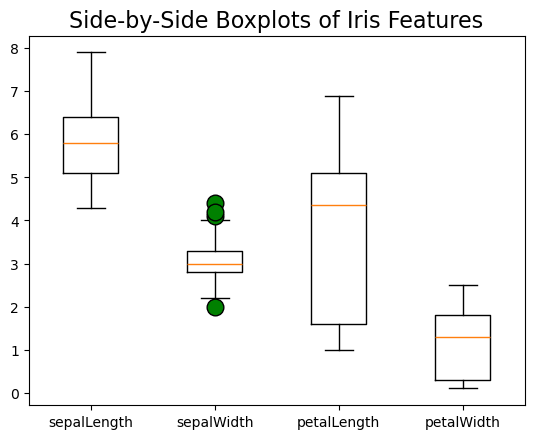

In [28]:
# Create figure, axis.
fig, ax = plt.subplots()

# before passing the data to the box plot function, i'm going to create flierprops as noted here: https://matplotlib.org/3.1.3/gallery/statistics/boxplot.html 
flierprops = dict(marker='o', markerfacecolor='green', markersize=12, linestyle='none')

# Create boxplot. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html 
ax.boxplot(iris_boxplot, flierprops=flierprops)

# # Set names of x-axis ticks.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html
ax.set_xticks([1, 2, 3, 4], ["sepalLength", "sepalWidth", "petalLength", "petalWidth"], fontsize=10)
ax.set_title("Side-by-Side Boxplots of Iris Features", fontsize=16)

# save the boxplot as a png file
plt.savefig("boxplot.png")

The boxplot above illustrates a few characteristics of the data. For example:
- Of all four columns, only sepal width has values that would be considered outliers. These are indicated by the green dots. The narrow boxplot element indicates low variablilty in values which are clustered around the median.
- Petal length has the greatest variability. The long top whisker indicates some positive skew. 
- Petal width has less variablility and is mildly positively skewed but appears close to normal.

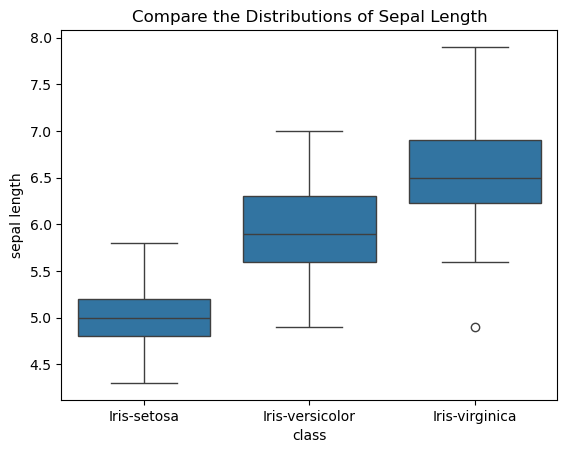

In [30]:
# that was a helpful overview of the data but i also want to check the individual class types and their distribution. To view individual class types, we can use the seaborn library.
# see: https://seaborn.pydata.org/generated/seaborn.boxplot.html

# how to set the title: https://how.dev/answers/how-to-add-a-title-to-a-seaborn-plot 
# im putting the different species across the x axis and using the sepal length column to plot my y. this is should give me the sepal length for all of the classes if my dataset is working how i want it to.
sns.boxplot(x="class", y="sepal length", data=iris_df).set_title("Compare the Distributions of Sepal Length")

# save the boxplot as a png file
plt.savefig("boxplot_sepallength.png")

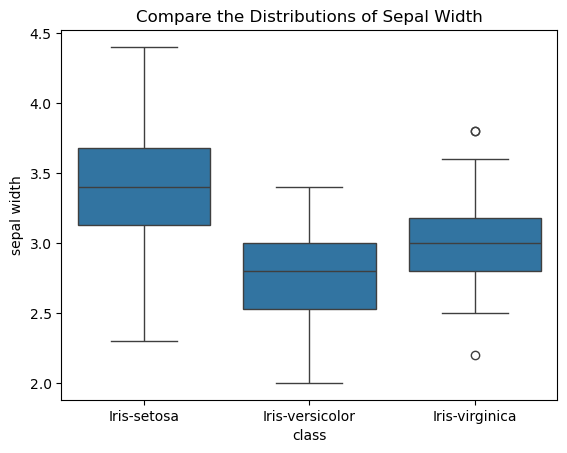

In [31]:
# repeat for other features
sns.boxplot(x="class", y="sepal width", data=iris_df).set_title("Compare the Distributions of Sepal Width")

# save the boxplot as a png file
plt.savefig("boxplot_sepalwidth.png")

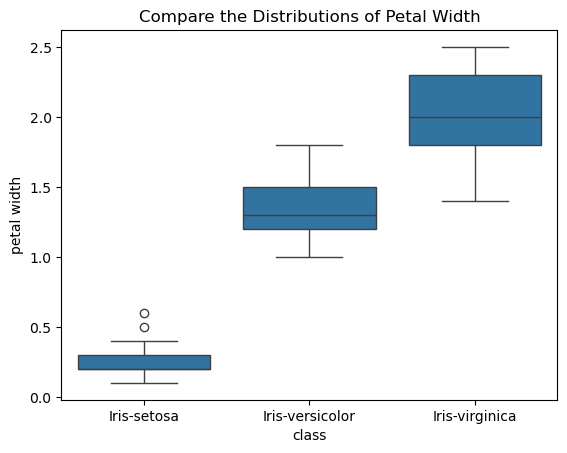

In [32]:
## repeat for other features
sns.boxplot(x="class", y="petal width", data=iris_df).set_title("Compare the Distributions of Petal Width")

# save the boxplot as a png file
plt.savefig("boxplot_petalwidth.png")

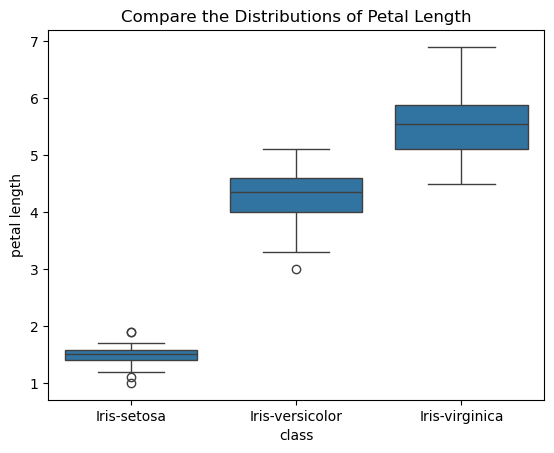

In [33]:
# repeat for other features
sns.boxplot(x="class", y="petal length", data=iris_df).set_title("Compare the Distributions of Petal Length")

# save the boxplot as a png file
plt.savefig("boxplot_petallength.png")

From the individual boxplots above, we learn the following:
- Iris setosa has the least variation and smallest values for most features (sepal length, petal length and width). It has particularly low variation where its petal data is concerned.
- For each feature, Iris virginia appears to have the largest measurements except for sepal width.
- The versicolour class falls in between the other two in terms of size of its features.
- The data above shows a fairly consistent pattern except for our sepal width feature.


## Step 5: Investigate the relationships between variables

This section will look at the relationship between each of the variables. We will first look at two methods to examine the relationships between each of the variables. These methods are: seborn's pairwise plot and panda's correlation matrix. Once we see all of the variables examined together, we can pull out the bivariate relationships we are most interested in.

First, let's use Seaborn's pairwise to quickly visualise relationships across the whole dataset. Using seaborn, each square shows how the variable specified on the x axis relates to the corresponding variable on the y axis. In my code below I've added the extra element of including hue which I explained earlier is similar to a grouping variable in seaborn plotting.

In [34]:
# set the styling of the figure. see: https://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn-set-style 
sns.set_style('darkgrid')

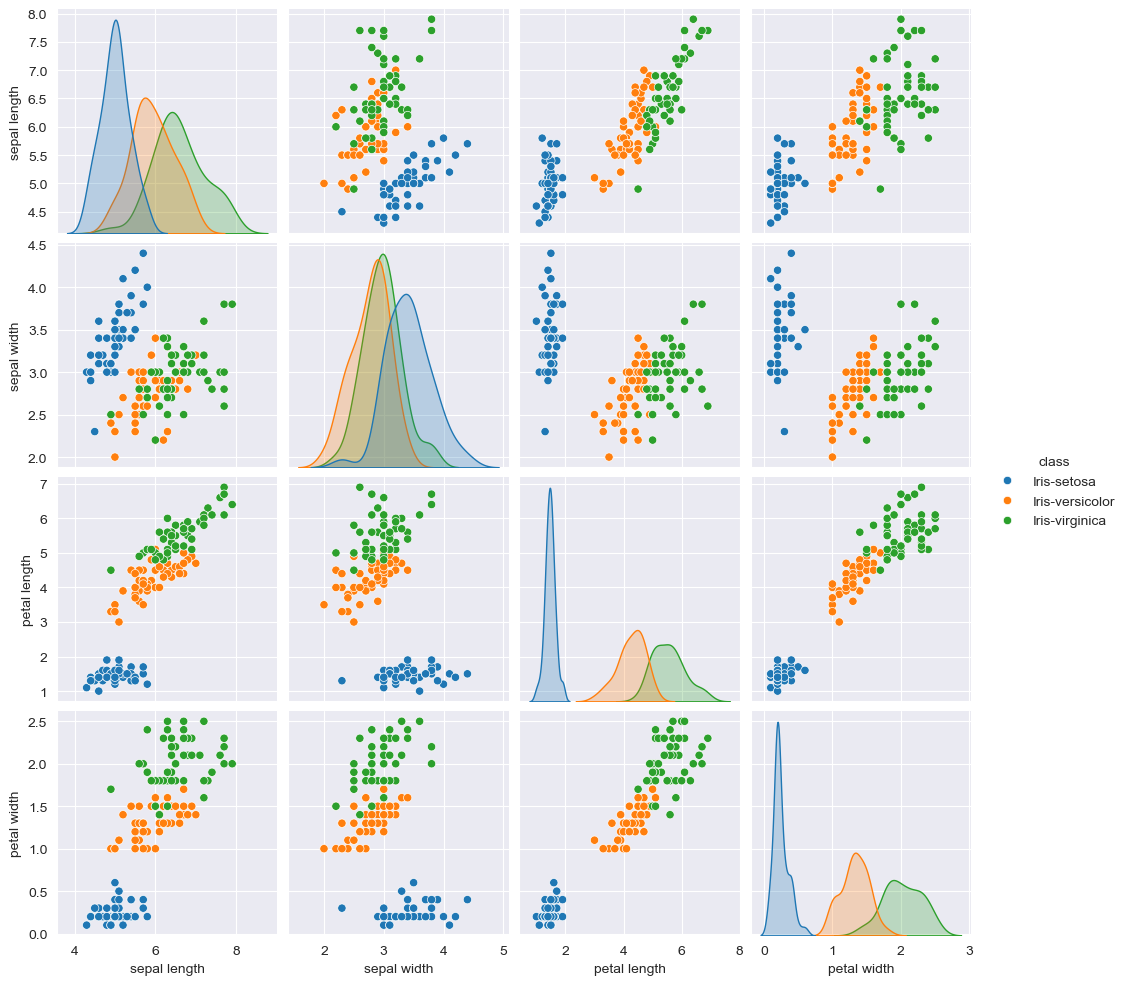

In [36]:
# see: https://seaborn.pydata.org/generated/seaborn.pairplot.html 
sns.pairplot(iris_df, hue="class")

# save the pairplot as a png file
plt.savefig("pairplot.png")

We can also use pandas to calculate Pearson's correlation across the dataset. 

In [37]:
# see the following on how to structure the code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas-dataframe-corr 
# When you don't specify parameters, this method defaults to Pearson correlation which is appropriate when using continuous and normally distributed data.
# see for more detail: https://docs.vultr.com/python/third-party/pandas/DataFrame/corr 
# you can only do the correlation on numeric data so i'll use the boxplot dataset i prepared before.
iris_boxplot.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [38]:
# save correlation to the file
with open('iris_project.txt', 'at') as f:
    print(iris_boxplot.corr(), file=f)

Pearson's correlation shows the direction and strength of a relationship between two variables. The correlation above shows the following:
- Strong positive relationship between sepal length and petal length
- Strong positive relationship between sepal length and petal width
- Strong positive relationship between petal length and petal width
- Moderate negative relationship between sepal width and petal length.

For more details on interpretting the output from Pearson's correlation see: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/#:~:text=High%20Degree%3A%20Values%20between%20%C2%B1,of%20zero%20implies%20no%20relationship. 

The relationships above can also be visualised using a heatmap.

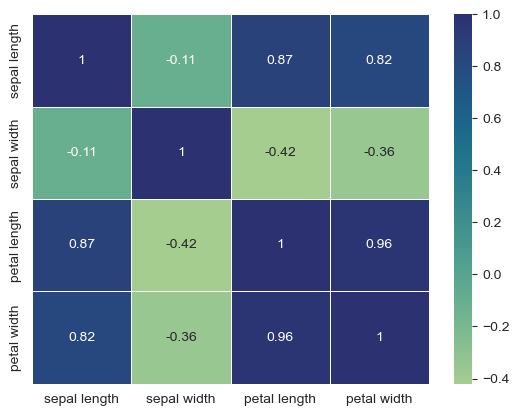

In [39]:
# use seaborn's heatmap function. See: https://seaborn.pydata.org/generated/seaborn.heatmap.html 
# cmap is optional parameter indicating how you want values to map to colour values.
# annot is an optional parameter determining if you want the heatmap annotated, and in this case i do.
# i've also added lines between cells to make it a bit more readable and less of a solid block of colour. 
# you can do loads as seen here: https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/ 
sns.heatmap(iris_boxplot.corr(),cmap="crest", annot=True, linewidth=.5)

# save the heatmap as a png file
plt.savefig("heatmap.png")

The analysis above has been helpful in getting an overview of the relationships between variables. Now let's hone in on one particular relationship of interest.

The scatterplot below shows the relationship between petal width and petal length.

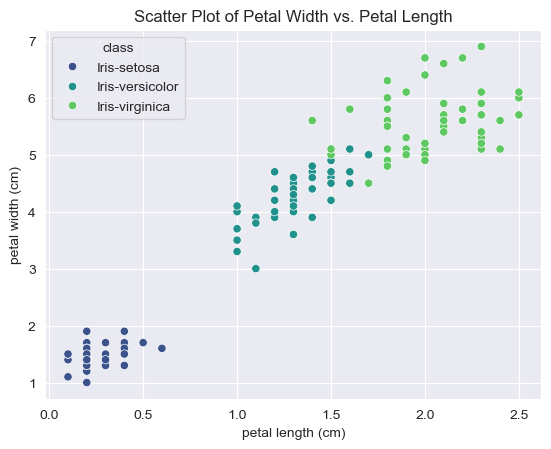

In [ ]:
#  create figure and axis to plot onto
# following stucture of code in lecture and  here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
fig, ax = plt.subplots()

# seaborn enables the colour coding of classes in the scatter plot very easily, that's the main reason I'm using it over matplotlib.
# code structure for plotting graph found here: https://seaborn.pydata.org/generated/seaborn.scatterplot.html 
# and https://www.geeksforgeeks.org/plotting-graph-for-iris-dataset-using-seaborn-and-matplotlib/ 
# Hue is a grouping variable that will produce points with different colors. It can be either categorical or numeric.
# palette is like colour map in matplot and you can choose your selection from those listed here: http://matplotlib.org/stable/users/explain/colors/colormaps.html 
sns.scatterplot(data=iris_df, x='petal width', y='petal length', hue='class', palette= 'viridis') 

# create some labels for the axes
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

#add title to chart
plt.title('Scatter Plot of Petal Width vs. Petal Length')

# save the scatterplot as a png file
plt.savefig("scatterplot.png")

#show the plt
plt.show()

Numpy's Polyfit according to GeeksforGeeks:
Polynomial fitting is a form of regression analysis where the relationship between the independent variable xand the dependent variable y is modeled as an n-degree polynomial. The goal is to find the polynomial coefficients that minimize the difference between the observed data points and the values predicted by the polynomial.

https://www.geeksforgeeks.org/numpys-polyfit-function-a-comprehensive-guide/

In [41]:
# https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn 
# one point above states linearregression() requires x to be a 2D array. 
# i initially got errors because this wasn't the case. the reshape(-1,1) below basically changes the x values from being a 1D array with 150 instances to a 2D array with 150 rows and 1 column.
# to use numpy reshape on a pandas df you have to use values as well which i learned from: https://stackoverflow.com/questions/14390224/how-to-reshape-a-pandas-series#:~:text=you%20can%20directly%20use%20a,convert%20DataFrame%20to%20numpy%20ndarray 

# set out the data I'll input to the regression function
x = iris_df["petal length"].values.reshape((-1, 1))
y = iris_df["petal width"]

In [42]:
# create a model that fits x points and y points using linear regression
# after errors i realise i had to reshape 
model = LinearRegression().fit(x, y)

In [43]:
# get the r squared score from the model
r_sq = model.score(x, y)
# print the result
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9269012279220037


In [45]:
# save the r squared score to the file
with open('iris_project.txt', 'at') as f:
    print(f"coefficient of determination: {r_sq}", file=f)

In [46]:
# round my r square value for the next task
r_sq = round(r_sq,2)

Linear Fit Coefficients: [ 0.41641913 -0.36651405]


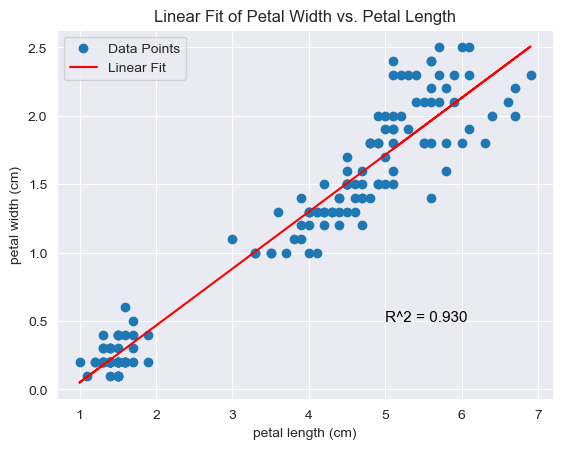

In [47]:
x = iris_df['petal length']
y = iris_df['petal width']

# Perform linear fit
coefficients = np.polyfit(x, y, 1)
print("Linear Fit Coefficients:", coefficients)

# Create polynomial function
p = np.poly1d(coefficients)

#plot this on a scatter plot, add labels of the data points, then plot the linear fit line.
plt.scatter(x, y, label='Data Points')
plt.plot(x, p(x), label='Linear Fit', color='red')
# instead of messing with the axis im trying to annotate inside the plot
# im adapting code from here but using python plain text formatting because of exposure to that style via Andrew: https://matplotlib.org/stable/users/explain/text/annotations.html#basic-annotation 
# the xy argument dictates placement
plt.annotate(f'R^2 = {r_sq:.3f}', xy=(5, 0.5),fontsize=11, color='black')
# create some labels for the axes
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Linear Fit of Petal Width vs. Petal Length')

# save the scatterplot as a png file
plt.savefig("linearfit.png")

# make the legend for the plot
plt.legend()
# show the plot
plt.show()